<a href="https://colab.research.google.com/github/stevengregori92/Predict-with-Lasso/blob/main/Predict_with_Lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [ ]:
import pandas as pd
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

#Import Dataset

In [ ]:
data = pd.read_csv('macro_monthly.csv')
data

,DATE,unrate,psr,m2,dspic,pce,reer,ir,ffer,tcs,indpro,ccpi
0,1981-01-01,7.5,10.9,1612.900,4980.4,1870.0,NaN,12.568571,19.084516,NaN,51.1668,85.400
1,1981-02-01,7.4,10.8,1608.125,4965.0,1884.2,NaN,13.194444,15.934286,NaN,50.9509,85.900
2,1981-03-01,7.4,10.8,1629.400,4979.0,1902.9,NaN,13.115909,14.703871,NaN,51.2066,86.400
3,1981-04-01,7.2,10.9,1665.575,4965.1,1904.4,NaN,13.679524,15.719000,NaN,50.9711,87.000
4,1981-05-01,7.5,11.0,1655.150,4974.8,1913.8,NaN,14.099500,18.517742,NaN,51.2645,87.800
...,...,...,...,...,...,...,...,...,...,...,...,...
485,2021-06-01,5.9,9.5,20463.275,15603.3,15802.0,115.39,1.519091,0.078000,1579265.0,100.4704,278.140
486,2021-07-01,5.4,10.6,20589.975,15739.4,15804.8,117.01,1.318571,0.098065,1581128.0,101.2442,279.054
487,2021-08-01,5.2,9.9,20788.780,15723.0,15975.8,117.27,1.283182,0.092258,1596816.0,101.1061,279.338
488,2021-09-01,4.8,8.2,20981.450,15468.7,16076.4,117.16,1.374762,0.079333,1594756.0,100.0811,280.017


#Explore Dataset

In [ ]:
len(data), len(data.dropna())

(490, 334)

In [ ]:
data = data.dropna()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 156 to 489
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    334 non-null    object 
 1   unrate  334 non-null    float64
 2   psr     334 non-null    float64
 3   m2      334 non-null    float64
 4   dspic   334 non-null    float64
 5   pce     334 non-null    float64
 6   reer    334 non-null    float64
 7   ir      334 non-null    float64
 8   ffer    334 non-null    float64
 9   tcs     334 non-null    float64
 10  indpro  334 non-null    float64
 11  ccpi    334 non-null    float64
dtypes: float64(11), object(1)
memory usage: 33.9+ KB


#Analyse Data

In [ ]:
X = data.drop(['DATE', 'ccpi'], axis = 1)
y = data['ccpi']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .25, random_state = 42)

Normalised

In [ ]:
norm = MinMaxScaler().fit(X_train)

X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

Standardised

In [ ]:
stand = StandardScaler().fit(X_train)

X_train_stand = stand.transform(X_train)
X_test_stand = stand.transform(X_test)

In [ ]:
abs = MaxAbsScaler().fit(X_train)

X_train_abs = abs.transform(X_train)
X_test_abs = abs.transform(X_test)

Compare Test

In [ ]:
score=[]

trainX = [X_train, X_train_norm, X_train_stand, X_train_abs]
testX = [X_test, X_test_norm, X_test_stand, X_test_abs]

for X_train_set, X_test_set in zip(trainX, testX):
  lasso = LassoCV()

  lasso.fit(X_train_set, y_train)
  y_pred = lasso.predict(X_test_set)
  accuracy = r2_score(y_pred, y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.486e+01, tolerance: 2.828e+01
  model = cd_fast.enet_coordinate_descent(


In [ ]:
pd.DataFrame({'score':accuracy}, index = ['Organised', 'Normalized', 'Standardized', "ABS"])

,score
Organised,0.995804
Normalized,0.995804
Standardized,0.995804
ABS,0.995804


In [ ]:
lasso = LassoCV()

lasso.fit(X_train_norm, y_train)
perm_importance = permutation_importance(lasso, X_test_norm, y_test)
perm_importance.importances_mean

array([ 4.89734565e-04, -7.10164206e-04, -8.31511087e-05,  6.88838684e-02,
        1.17474185e+00,  3.13808838e-04,  2.60311826e-03,  8.56448435e-05,
        2.81635750e-03,  0.00000000e+00])

<AxesSubplot:>

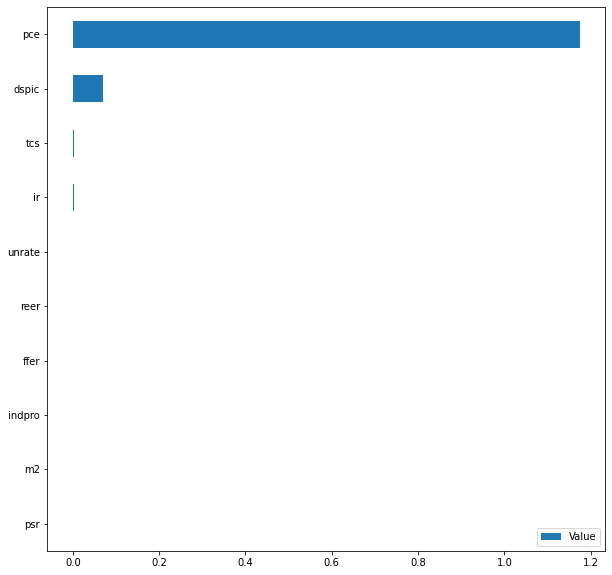

In [ ]:
sorted = perm_importance.importances_mean.argsort()

df = pd.DataFrame(perm_importance.importances_mean[sorted], X_test.columns[sorted], columns = ['Value'])
df.plot.barh(figsize = (10,10))

#Insights
 - ccpi in US economic indicators mostly influend by pce (Personal Consumption Expenditures)
 - Government could ccpi by increase Personal Consumption Expenditures.